# Building a Recurrent Neural Network (RNN)

Use RNN to do text classification on IMDB movie review dataset



## Library Imports

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## Load the dataset

In [3]:
# we will define a vocab_size limit and will load the data based on that vocab_size
vocab_size = 20000

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/suvosmac/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/suvosmac/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarra

In [5]:
# Padding all sequences, so that the reviews are of the same length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=200) # We will take reviews till 200 words
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=200)

## Building the Recurrent Neural Network

In [6]:
# Some constants for the RNN
LSTM_UNITS = 128
OUTPUT_UNITS = 1
LSTM_ACTIVATION = tf.keras.activations.tanh
OUTPUT_ACTIVATION = tf.keras.activations.sigmoid

#OPTIMIZER = tf.keras.optimizers.RMSprop()
OPTIMIZER = tf.keras.optimizers.Adam()
LOSS = tf.keras.losses.binary_crossentropy
METRICS = ['accuracy']

NUM_EPOCHS = 5
BATCH_SIZE = 128

In [7]:
model = tf.keras.Sequential()
# Embedding layer allows the rnn to get trained from a word vector representation
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=LSTM_UNITS, input_shape=(X_train.shape[1],)))
# Adding the LSTM layer
model.add(tf.keras.layers.LSTM(units=LSTM_UNITS, activation=LSTM_ACTIVATION))
# Adding the Dense Output layer
model.add(tf.keras.layers.Dense(units=OUTPUT_UNITS, activation=OUTPUT_ACTIVATION))

# Compiling the model
model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

# Check the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


2022-07-20 12:08:35.540077: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the Model

In [8]:
epochs_fit = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5


2022-07-20 12:08:35.744564: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


196/196 [==============================] - 67s 335ms/step - loss: 0.5211 - accuracy: 0.7137
Epoch 2/5
196/196 [==============================] - 67s 344ms/step - loss: 0.1992 - accuracy: 0.9245
Epoch 3/5
196/196 [==============================] - 71s 363ms/step - loss: 0.1141 - accuracy: 0.9619
Epoch 4/5
196/196 [==============================] - 74s 376ms/step - loss: 0.0917 - accuracy: 0.9688
Epoch 5/5
196/196 [==============================] - 77s 391ms/step - loss: 0.0526 - accuracy: 0.9840


Text(0.5, 1.0, 'Training Accuracy Progress')

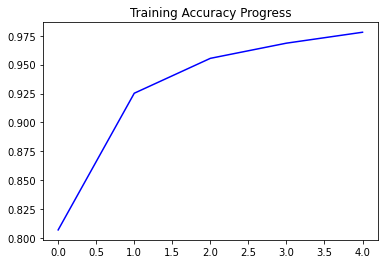

In [9]:
# Plot the training accuracy
epochs = range(len(epochs_fit.history['accuracy']))
plt.plot(epochs, epochs_fit.history['accuracy'], 'b', label='Training Accuracy')
plt.title("Training Accuracy Progress")

Text(0.5, 1.0, 'Training Loss Decline')

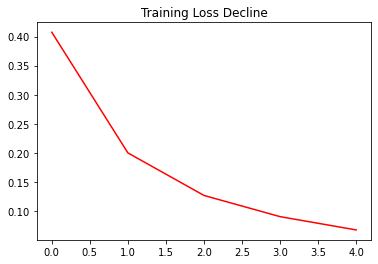

In [10]:
# Plot the training loss
epochs = range(len(epochs_fit.history['loss']))
plt.plot(epochs, epochs_fit.history['loss'], 'r', label='Training Loss')
plt.title('Training Loss Decline')

## Evaluating the Model

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy - {test_accuracy}")
print(f"Test Loss - {test_loss}")

782/782 [==============================] - 29s 36ms/step - loss: 0.5249 - accuracy: 0.8573
Test Accuracy - 0.8572800159454346
Test Loss - 0.5249256491661072


In [12]:
# Do the predictions as per the model on the test data
predictions = model.predict_classes(X_test)
print("Classification Report")
print(classification_report(predictions, y_test))
print("\n")
print("Confusion Matrix")
print(confusion_matrix(predictions, y_test))

/Users/suvosmac/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     12682
           1       0.85      0.86      0.86     12318

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



Confusion Matrix
[[10807  1875]
 [ 1693 10625]]
